In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np
import scipy as sc
import pylab as pl
import pylab as plb
plb.rcParams['font.size'] = 24
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':24})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

/Users/pirkl/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


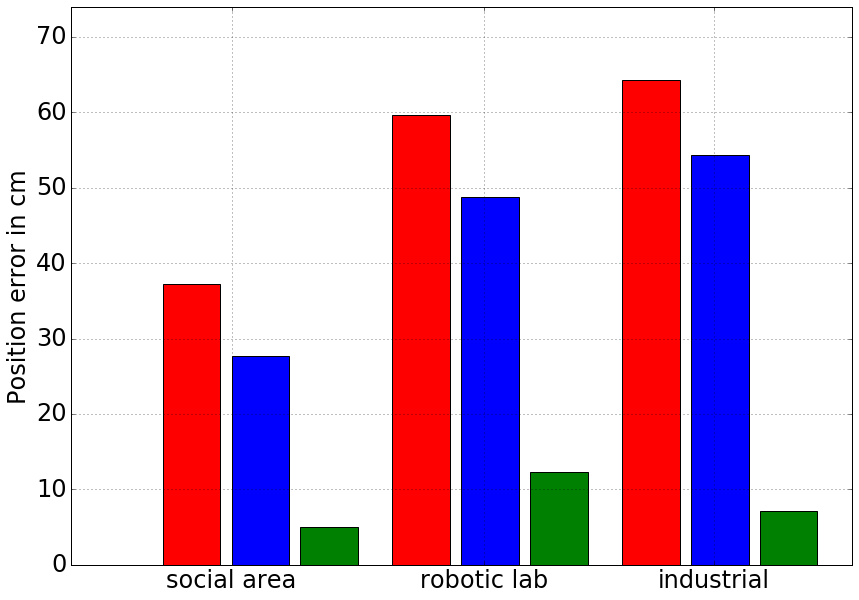

In [2]:
data_x=np.array([1,2,3])
data_y_median_error_uncalib=np.array([37.2,59.7,64.3])
data_y_median_error_calib=np.array([27.7,48.8,54.3])
data_y_median_error_error_card=np.array([5,12.3,7.1])

pl.figure(figsize=(14,10))
ax=pl.subplot(111)
pl.bar(data_x,data_y_median_error_uncalib,width=0.25,color='r',label='raw')
pl.bar(data_x+0.3,data_y_median_error_calib,color='b',width=0.25,label='calibrated')
pl.bar(data_x+0.6,data_y_median_error_error_card,color='g',width=0.25,label='calibrated and error map')
pl.grid()


pl.xlim([0.6,4])
pl.ylim([0,74])
pl.ylabel('Position error in cm')
pl.xticks([1.3,2.4,3.4],['social area','robotic lab','industrial'])
pl.savefig('error.pdf')
pl.show()

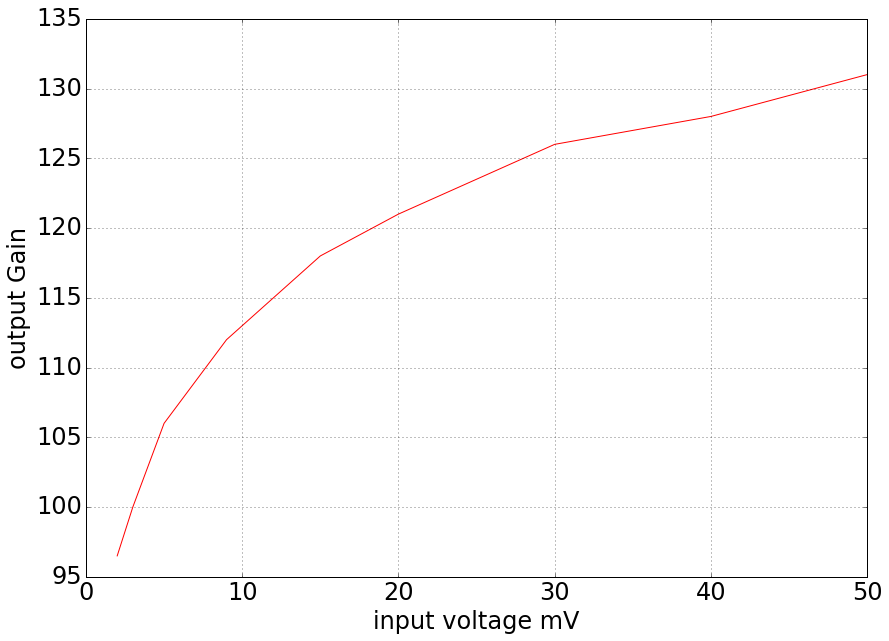

In [8]:
amp_data = sc.loadtxt('amplifier.log')
polyx = np.polyfit(amp_data[:,0],amp_data[:,2],4)
approx = np.poly1d(polyx)(np.array(range(3,50)))


pl.figure(figsize=(14,10))
ax  = pl.subplot(111)
#pl.plot(amp_data[:,0],amp_data[:,1],'.-b')
pl.plot(amp_data[:,0],amp_data[:,2]/0.02,'-r',label='raw data')
#pl.plot(np.array(range(3,50)),approx,'--r',label='approximated 3degree polynome')


#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
#          ncol=3, fancybox=True, shadow=False)
pl.grid()
pl.xlabel('input voltage mV')
pl.ylabel('output Gain' )
pl.savefig('amplification.pdf')
pl.show()

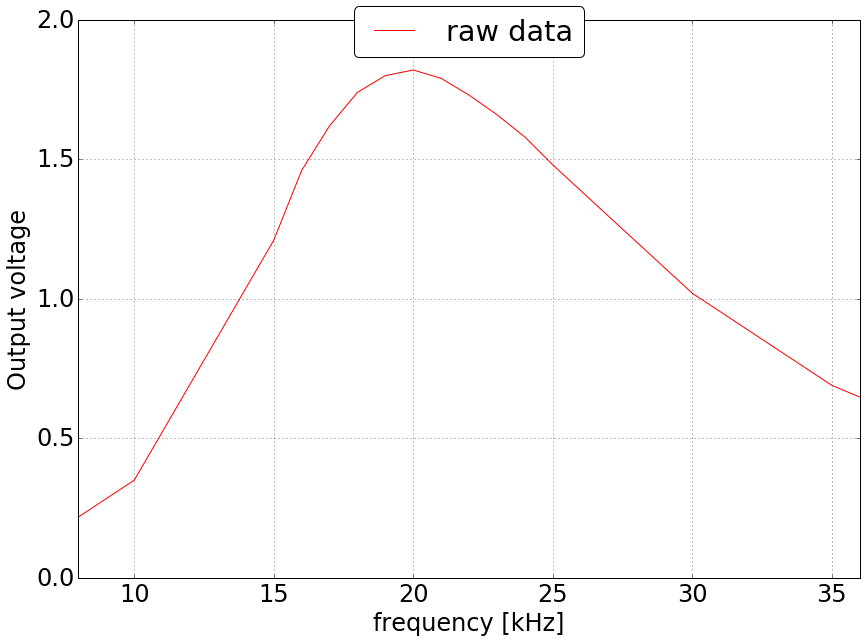

In [6]:
filter_data = sc.loadtxt('filter.log')
polyx = np.poly1d(np.polyfit(filter_data[:,0],filter_data[:,1],7))
approximated = polyx(np.array(range(5,40)))


pl.figure(figsize=(14,10))
ax=pl.subplot(111)
pl.plot(filter_data[:,0],filter_data[:,1],'-r',label='raw data')
#pl.plot(np.array(range(5,40)),approximated,'--r',label='approximated')
pl.grid()
pl.xlabel('frequency [kHz]')
pl.ylabel('Output voltage')
pl.xlim([8,36])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=False)
pl.savefig('filterresponse.pdf')
pl.show()

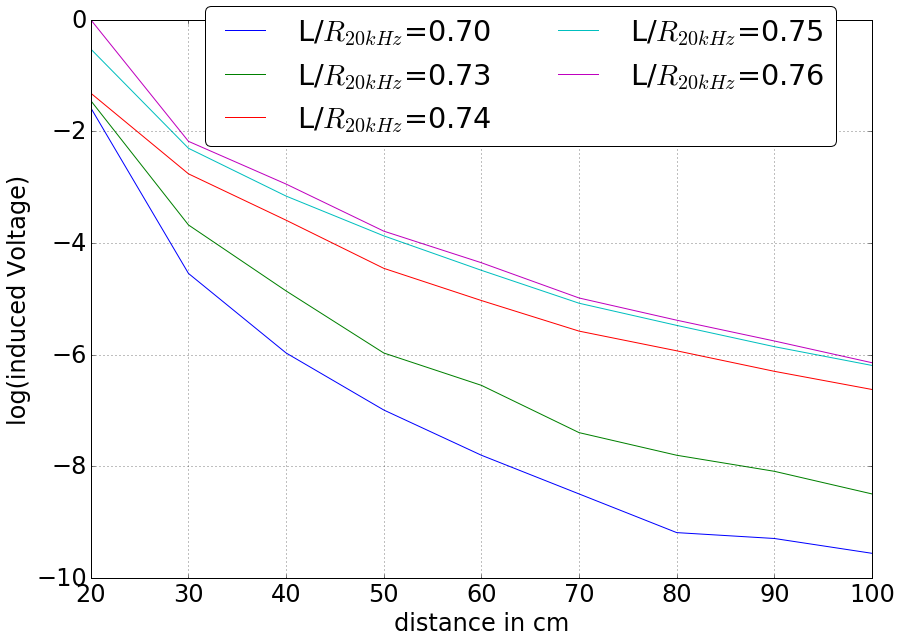

In [5]:
induced_voltages = sc.loadtxt('receiver_coils.log')
coil_fraction=[0.73,0.75,0.76,0.70,0.74]

max_value = np.max(induced_voltages[:,1:])
induced_voltages[:,1] = np.log(induced_voltages[:,1]/max_value)
induced_voltages[:,2] = np.log(induced_voltages[:,2]/max_value)
induced_voltages[:,3] = np.log(induced_voltages[:,3]/max_value)
induced_voltages[:,4] = np.log(induced_voltages[:,4]/max_value)
induced_voltages[:,5] = np.log(induced_voltages[:,5]/max_value)

pl.figure(figsize=(14,10))
ax = pl.subplot(111)


pl.plot(induced_voltages[:,0],induced_voltages[:,4],label='L/$R_{20kHz}$=0.70')
pl.plot(induced_voltages[:,0],induced_voltages[:,1],label='L/$R_{20kHz}$=0.73')
pl.plot(induced_voltages[:,0],induced_voltages[:,5],label='L/$R_{20kHz}$=0.74')
pl.plot(induced_voltages[:,0],induced_voltages[:,2],label='L/$R_{20kHz}$=0.75')
pl.plot(induced_voltages[:,0],induced_voltages[:,3],label='L/$R_{20kHz}$=0.76')
pl.grid()
ax.legend(loc='upper center', bbox_to_anchor=(0.55, 1.05),
          ncol=2, fancybox=True, shadow=False)
pl.xlabel('distance in cm')
pl.ylabel('log(induced Voltage)')
pl.savefig('range_receiver_coils.pdf')
pl.show()